Flow shop [premptive]

[[0, 0, 0, 2], [0, 0, 0, 2]]
[9, 9, 9, 9]
Total:  19


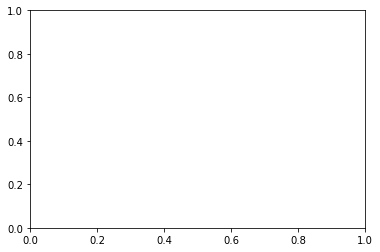

In [1]:
#graph plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gprocess=[]
gtask=[]
gtime=[]

process = [[3, 0, 4, 5],[0, 3, 2, 2]]  #[[2, 3, 5],[0, 3, 2]] 

tt=[] #total time / worst case

#making of taask flag
ti = [] #progress of the task
m=len(process)
n=len(process[0])

for i in range(m): 
    ti.append([]) 
    for j in range(n):
        if j==(n-1):
            ti[i].append(2)
        else:
            ti[i].append(0)
print(ti) 

#making of process flag
po=[] #processor occupied by process n
for i in range (len(process[0])):
    po.append(9)
#po[0]=1
print(po)

# ti=[[0, 0, 2],[0, 0, 2]]
# print(ti)

for list in process:
    for number in list:
        tt.append(number)
#print(tt)
total=0
for ele in range(0, len(tt)): 
    total = total + tt[ele] 

#printing total value 
print("Total: ", total) 
#non premptive = 11
#premptive = 12

In [2]:
def flowshop():
    time = 0
    x=0
    y=0
    k=0
    
    for time in range(total):
        print("\n")
        print("\n")
        print(f"time=",time+1)
        count=0

        for x in range(len(process)):
            print("\n")
            print(f"x={x}")

            for y in range(len(process[0])):
                print(f"y={y+1}")
                print("po=",po)
                print("ti=",ti)
                print(f"process={process}")
                print(f"dealing with process: process[{x+1}],[{y+1}]")
                if process[x][y]!=0:
                    if po[y]>=x and ti[x][y-1]==2:
                        print(f"process[{x+1}][{y+1}] before={process[x][y]}")
                        process[x][y] = process[x][y] - 1
                        print(f"process[{x+1}][{y+1}] after={process[x][y]}")
                        ti[x][y]=1
                        print("ti=",ti)
                        print(process)
                        gprocess.append(x)
                        gtask.append(y)
                        gtime.append(time)
                        po[y]=x
                        print(f"po[{y+1}]={po[y]+1}")
                    else:
                        print("nothing executed")
                else:
                    print(f"process task [{x+1}],[{y+1}] is completed")
                    po[y]=9
                    count=count+1
                    ti[x][y]=2
                    #break

        if count==len(tt):
            print("time required",time)
            break

In [3]:
flowshop()





time= 1


x=0
y=1
po= [9, 9, 9, 9]
ti= [[0, 0, 0, 2], [0, 0, 0, 2]]
process=[[3, 0, 4, 5], [0, 3, 2, 2]]
dealing with process: process[1],[1]
process[1][1] before=3
process[1][1] after=2
ti= [[1, 0, 0, 2], [0, 0, 0, 2]]
[[2, 0, 4, 5], [0, 3, 2, 2]]
po[1]=1
y=2
po= [0, 9, 9, 9]
ti= [[1, 0, 0, 2], [0, 0, 0, 2]]
process=[[2, 0, 4, 5], [0, 3, 2, 2]]
dealing with process: process[1],[2]
process task [1],[2] is completed
y=3
po= [0, 9, 9, 9]
ti= [[1, 2, 0, 2], [0, 0, 0, 2]]
process=[[2, 0, 4, 5], [0, 3, 2, 2]]
dealing with process: process[1],[3]
process[1][3] before=4
process[1][3] after=3
ti= [[1, 2, 1, 2], [0, 0, 0, 2]]
[[2, 0, 3, 5], [0, 3, 2, 2]]
po[3]=1
y=4
po= [0, 9, 0, 9]
ti= [[1, 2, 1, 2], [0, 0, 0, 2]]
process=[[2, 0, 3, 5], [0, 3, 2, 2]]
dealing with process: process[1],[4]
nothing executed


x=1
y=1
po= [0, 9, 0, 9]
ti= [[1, 2, 1, 2], [0, 0, 0, 2]]
process=[[2, 0, 3, 5], [0, 3, 2, 2]]
dealing with process: process[2],[1]
process task [2],[1] is completed
y=2
po= [9, 9, 0, 9]


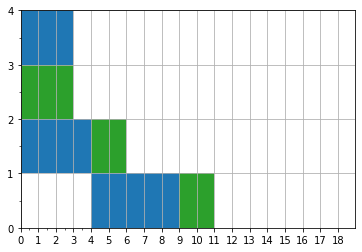

In [4]:
#graph
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

for i in range(0,len(gprocess)):
    major_ticks = np.arange(0, total, 1)
    minor_ticks = np.arange(0, n, 0.5)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_xlim(0,total)
    ax.set_ylim(0,len(process[0]))
    if gprocess[i]==0:
        ax.broken_barh([(gtime[i], 1)], (((n-1)-gtask[i]), 1), facecolors='tab:blue')
    else:
        ax.broken_barh([(gtime[i], 1)], (((n-1)-gtask[i]), 1), facecolors='tab:green')
ax.grid(True)
plt.show()